In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for making prettier plots!
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px


pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20.0, 10.0]
plt.rcParams["figure.facecolor"] = "white"



In [171]:
#to store your output  
import chart_studio
username='your chart_studio username'
api_key='your chart_studio API key'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [174]:
import chart_studio.plotly as py
import chart_studio.tools as tls

In [2]:
import os

folder_path = 'Data/' # replace with your folder path
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]


In [3]:
dfs = [] # list to store each Excel file's DataFrame

for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True) # combine all DataFrames into a single DataFrame


In [4]:
combined_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason
1,1652797,WARRINGAH,2019-04-01 00:00:00,2019-04-01 01:08:00,66,75.30303,Environmental
2,1652798,GOSFORD,2019-04-01 00:00:00,2019-04-01 02:25:00,105,70,Environmental
3,1652802,WYONG,2019-04-01 00:00:00,2019-04-01 04:31:00,1112,84.620628,Environmental
4,1653082,BANKSTOWN,2019-04-01 00:00:00,2019-04-01 22:54:41,62,245.316667,Equipment fault


In [5]:
df  = combined_df.copy()

df.columns = df.iloc[0] 

# drop the first row since it is now the column names
df = df.drop(0)

# reset the index of the DataFrame
df = df.reset_index(drop=True)


In [6]:
df  = combined_df.copy()

In [7]:
df.columns = df.iloc[0] 

# drop the first row since it is now the column names
df = df.drop(0)

# reset the index of the DataFrame
df = df.reset_index(drop=True)

In [8]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason
0,1652797,WARRINGAH,2019-04-01 00:00:00,2019-04-01 01:08:00,66,75.30303,Environmental
1,1652798,GOSFORD,2019-04-01 00:00:00,2019-04-01 02:25:00,105,70,Environmental
2,1652802,WYONG,2019-04-01 00:00:00,2019-04-01 04:31:00,1112,84.620628,Environmental
3,1653082,BANKSTOWN,2019-04-01 00:00:00,2019-04-01 22:54:41,62,245.316667,Equipment fault
4,1653088,WOOLLAHRA,2019-04-02 00:00:00,2019-04-02 00:45:00,89,40,Equipment fault


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13487 entries, 0 to 13486
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Event ID               13487 non-null  object
 1   LGA                    13487 non-null  object
 2   Start Date             13487 non-null  object
 3   Start Time             13487 non-null  object
 4   Customers Interrupted  13487 non-null  object
 5   Ave Dur. (min)         13487 non-null  object
 6   Reason                 13487 non-null  object
dtypes: object(7)
memory usage: 737.7+ KB


In [10]:
# Remove rows with 'Start Date' value
df = df[df['Start Date'] != 'Start Date']
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S')
df["Start Time"] = pd.to_datetime(df["Start Time"],format='%Y-%m-%d %H:%M:%S')

#Breakdown Date fields and convert other fields to integer
df['Year'] = df['Start Time'].dt.year
df['Month'] = df['Start Time'].dt.month
df['Day'] = df['Start Time'].dt.day
df['Hour'] = df['Start Time'].dt.hour

#Get the  day of  the  week 
df['Day_of_week'] = pd.DatetimeIndex(df['Start Time']).dayofweek
df["Is Weekday"] = (df['Day_of_week'] < 5)
df["Is Weekend"] = (df['Day_of_week'] > 4)

days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['Day_Label'] = df['Day_of_week'].apply(lambda x: days[x])
DayCodes = ['','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [11]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.30303,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40,Equipment fault,2019,4,2,0,1,True,False,Tue


## Frequency analysis : 
##### Determine the frequency of outages by location, start date, start time, and reason. This can help identify patterns and trends, as well as potential hotspots for future outages. 

In [31]:
# Group the data by location and count the number of outages in each loction
location_freq = df.groupby('LGA')['Event ID'].count().reset_index(name="Count")
location_freq

,LGA,Count
0,003,11
1,ASHFIELD,107
2,AUBURN,290
3,BANKSTOWN,750
4,BOTANY,117
5,BURWOOD,60
6,CANADA BAY,40
7,CANTERBURY,440
8,CESSNOCK,353
9,CHATSWOOD,4


In [37]:
# # Plot the location frequency as a bar chart

# location_freq.plot(kind='bar')
# plt.grid(False)
# plt.title('Outage Frequency by Location', fontsize=20)
# plt.xlabel('Location', fontsize=16)
# plt.ylabel('Frequency',fontsize=16)
# plt.show()

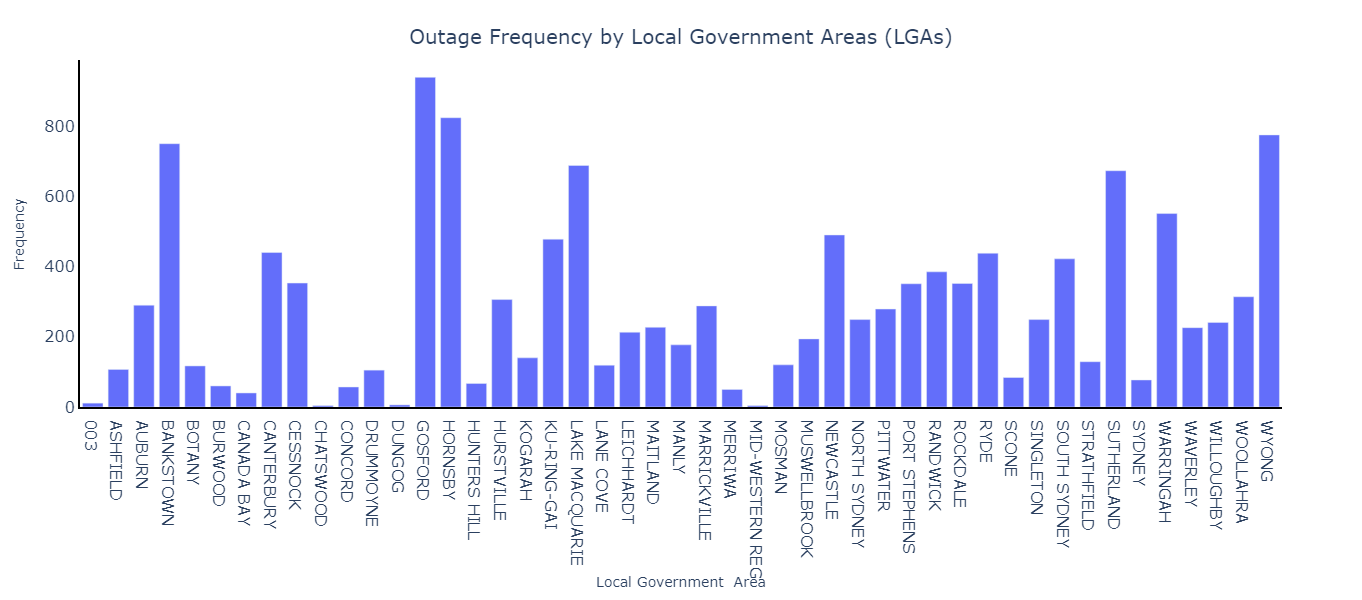

In [181]:
fig = px.bar(location_freq, x='LGA', y='Count')

fig.update_layout(
    title={'text': 'Outage Frequency by Local Government Areas (LGAs)', 'font': {'size': 20},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
   

    xaxis={'title': 'Local Government  Area', 'tickfont': {'size': 16}},
    yaxis={'title': 'Frequency', 'tickfont': {'size': 16}},
    showlegend=False,
    height=600,
    width=1500,
    plot_bgcolor='white'
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

In [182]:
py.plot(fig, filename="Outage_freq_by_LGA", auto_open = True)

'https://plotly.com/~wandabwa2004/52/'

In [50]:
df = df.rename(columns  = {"Event ID":"Event_ID"})

In [185]:
df

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.303030,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70.000000,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40.000000,Equipment fault,2019,4,2,0,1,True,False,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,1821703,MOSMAN,2020-12-30,2020-12-30 13:39:27,118,110.550000,Environmental,2020,12,30,13,2,True,False,Wed
13483,1821723,HORNSBY,2020-12-30,2020-12-30 14:30:00,148,10.000000,Equipment fault,2020,12,30,14,2,True,False,Wed
13484,1821769,RYDE,2020-12-31,2020-12-31 03:41:00,914,180.404372,Equipment fault,2020,12,31,3,3,True,False,Thu
13485,1821787,PORT STEPHENS,2020-12-31,2020-12-31 07:35:23,84,184.616667,Environmental,2020,12,31,7,3,True,False,Thu


In [187]:
df = df.drop_duplicates()

In [191]:
df[df["Event_ID"].duplicated()]

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
8969,1580827,KU-RING-GAI,2018-07-02,2018-07-02 10:19:00,1124,70.071048,Equipment fault,2018,7,2,10,0,True,False,Mon
8972,1581025,WARRINGAH,2018-07-02,2018-07-02 20:05:00,2610,145.875755,Environmental,2018,7,2,20,0,True,False,Mon
8973,1581075,LAKE MACQUARIE,2018-07-03,2018-07-03 09:03:00,1230,65.000000,Cable dig,2018,7,3,9,1,True,False,Tue
8974,1581083,MARRICKVILLE,2018-07-03,2018-07-03 09:18:00,1353,74.239882,Equipment fault,2018,7,3,9,1,True,False,Tue
8975,1581117,BANKSTOWN,2018-07-03,2018-07-03 11:12:41,57,158.550000,Environmental,2018,7,3,11,1,True,False,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,1598740,HURSTVILLE,2018-09-27,2018-09-27 10:58:00,815,73.197320,Equipment fault,2018,9,27,10,3,True,False,Thu
9247,1598767,BANKSTOWN,2018-09-27,2018-09-27 12:32:19,65,87.683333,Environmental,2018,9,27,12,3,True,False,Thu
9248,1598837,HURSTVILLE,2018-09-27,2018-09-27 15:50:00,2897,65.002065,Equipment fault,2018,9,27,15,3,True,False,Thu
9249,1598959,CANTERBURY,2018-09-28,2018-09-28 10:40:47,65,104.216667,Environmental,2018,9,28,10,4,True,False,Fri


In [197]:
df[df["Year"] == 2013]

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
2872,956439,RYDE,2013-04-02,2013-04-02 07:38:00,64,137.000000,Third party,2013,4,2,7,1,True,False,Tue
2873,956577,SINGLETON,2013-04-02,2013-04-02 10:35:00,54,22.000000,Equipment fault,2013,4,2,10,1,True,False,Tue
2874,956624,RANDWICK,2013-04-02,2013-04-02 11:05:00,1046,101.468778,Equipment fault,2013,4,2,11,1,True,False,Tue
2875,956714,LAKE MACQUARIE,2013-04-02,2013-04-02 13:55:00,195,40.000000,Third party,2013,4,2,13,1,True,False,Tue
2876,956945,CANTERBURY,2013-04-03,2013-04-03 08:37:29,89,72.516667,Third party,2013,4,3,8,2,True,False,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,988146,BANKSTOWN,2013-06-28,2013-06-28 11:32:00,823,144.820809,Equipment fault,2013,6,28,11,4,True,False,Fri
3208,988497,GOSFORD,2013-06-29,2013-06-29 11:19:00,409,61.000000,Equipment fault,2013,6,29,11,5,False,True,Sat
3209,988903,NORTH SYDNEY,2013-06-29,2013-06-29 17:50:00,97,85.000000,Equipment fault,2013,6,29,17,5,False,True,Sat
3210,988720,WOOLLAHRA,2013-06-30,2013-06-30 11:29:24,57,170.600000,Environmental,2013,6,30,11,6,False,True,Sun


In [198]:
df["Year"].unique()

array([2019, 2017, 2015, 2016, 2021, 2013, 2018, 2022, 2020])

In [193]:
# Group the data by start date and count the number of outages on each date
date_freq = df.groupby('Year')['Event_ID'].count()

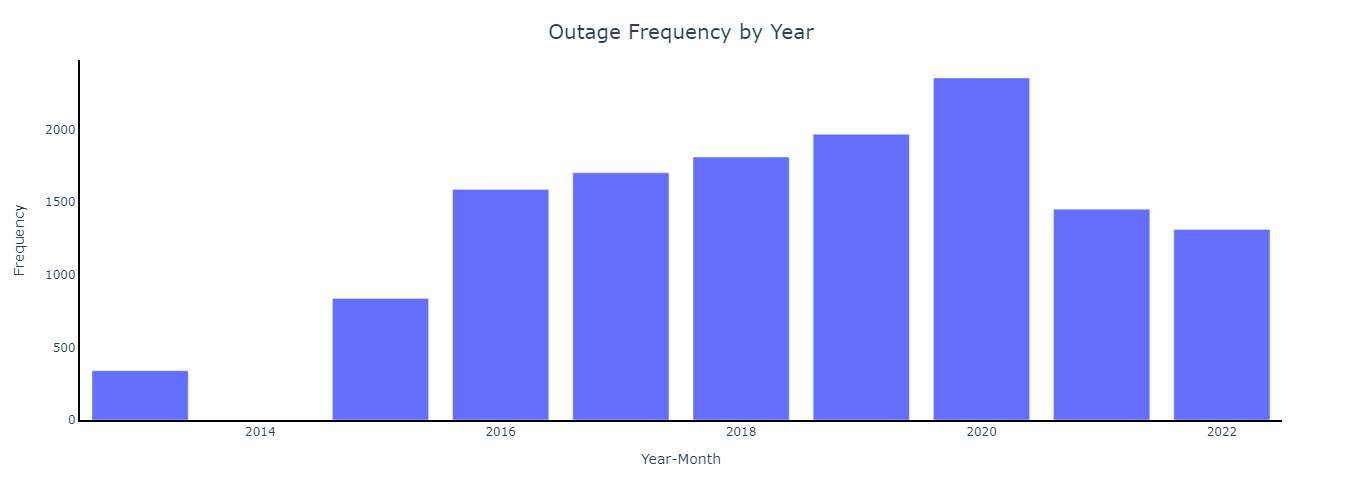

In [200]:
date_freq = df.groupby('Year')['Event_ID'].count()
fig = px.bar(date_freq, x=date_freq.index, y='Event_ID')
fig.update_layout(
    title={'text': 'Outage Frequency by Year', 'font': {'size': 20},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
 
    xaxis_title='Year-Month', 
    yaxis_title='Frequency',
    showlegend=False,
    height=500,
    width=900,
    plot_bgcolor='white')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [201]:
py.plot(fig, filename="Outage_freq_by_year", auto_open = True)

'https://plotly.com/~wandabwa2004/55/'

In [67]:
# Group the data by start time and count the number of outages during each hour
time_freq = df.groupby('Start Time')['Event_ID'].count()

In [69]:
# # Plot the time frequency as a line chart
# time_freq.plot()
# plt.title('Outage Frequency by Time')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# Group the data by reason and count the number of outages for each reason
# reason_freq = data.groupby('Reason')['Event ID'].count()

# # Plot the reason frequency as a pie chart
# reason_freq.plot(kind='pie')
# plt.title('Outage Frequency by Reason')
# plt.ylabel('')
# plt.show()

In [26]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.30303,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40,Equipment fault,2019,4,2,0,1,True,False,Tue


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 13486
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event ID               13459 non-null  object        
 1   LGA                    13459 non-null  object        
 2   Start Date             13459 non-null  datetime64[ns]
 3   Start Time             13459 non-null  datetime64[ns]
 4   Customers Interrupted  13459 non-null  object        
 5   Ave Dur. (min)         13459 non-null  object        
 6   Reason                 13459 non-null  object        
 7   Year                   13459 non-null  int64         
 8   Month                  13459 non-null  int64         
 9   Day                    13459 non-null  int64         
 10  Hour                   13459 non-null  int64         
 11  Day_of_week            13459 non-null  int64         
 12  Is Weekday             13459 non-null  bool          
 13  I

In [70]:
df["Ave Dur. (min)"]  = df["Ave Dur. (min)"].astype(float)

### Correlation plot 

In [71]:
def plot_heatmap(corrmat, correlation_variable, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

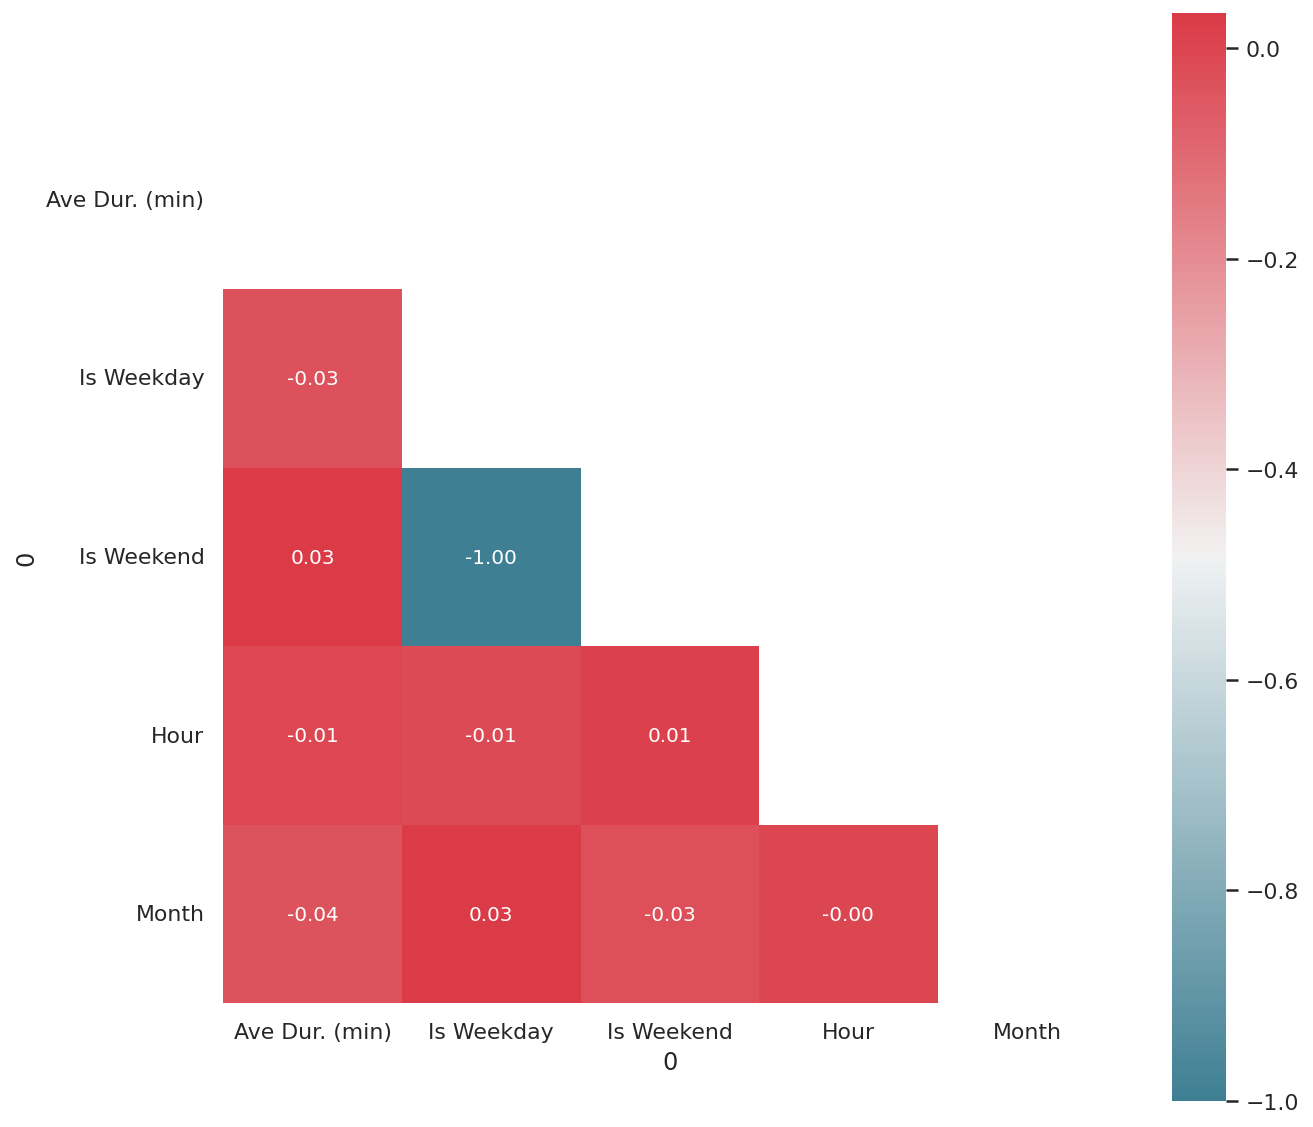

In [72]:
correlation_variable = 'Ave Dur. (min)'
corrdf_calories = df[['Ave Dur. (min)','Customers Interrupted','Day_Label', 'Is Weekday', 'Is Weekend','Hour','Month']]
plot_heatmap(corrdf_calories.corr(), correlation_variable, '')

In [73]:
dayofweek_grouped_data = df.groupby(['Day_of_week']).mean()
dayTypeGroupedData = df.groupby(['Is Weekday']).mean()

In [82]:
dayofweek_grouped_data1 = df.groupby(['Day_Label'])["Ave Dur. (min)"].mean().reset_index(name="Average_Duration")

In [83]:
dayofweek_grouped_data1

,Day_Label,Average_Duration
0,Fri,196.825251
1,Mon,179.999998
2,Sat,206.954115
3,Sun,189.873400
4,Thu,170.625809
5,Tue,169.603734
6,Wed,173.016317


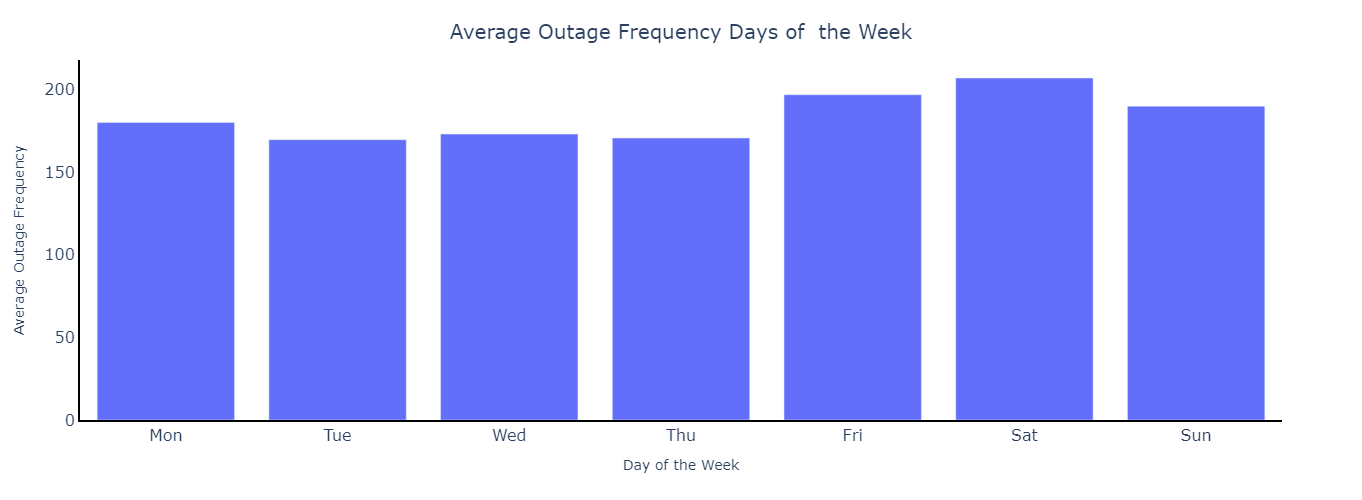

In [211]:
fig = px.bar(dayofweek_grouped_data1, x='Day_Label', y='Average_Duration')

fig.update_layout(
    title={'text': 'Average Outage Frequency Days of  the Week', 'font': {'size': 20},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
   

    xaxis={'title': 'Day of the Week', 'tickfont': {'size': 16}},
    yaxis={'title': 'Average Outage Frequency', 'tickfont': {'size': 16}},
    showlegend=False,
    height=500,
    width=900,
    plot_bgcolor='white'
 
)
fig.update_xaxes(categoryorder='array', categoryarray= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

In [212]:
py.plot(fig, filename="average_freq_by_day", auto_open = True)

'https://plotly.com/~wandabwa2004/62/'

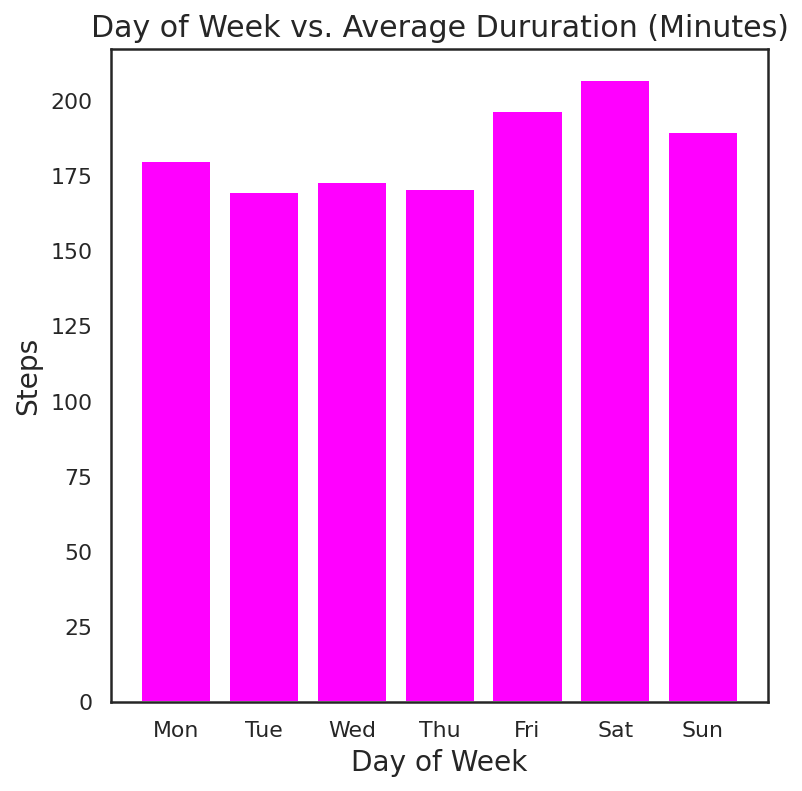

In [75]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Ave Dur. (min)'], color='magenta')
plt.title('Day of Week vs. Average Duration (Minutes)', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
# ax.axhline(8000, color="orangered", linestyle='--')
# ax.axhline(10000, color="green", linestyle='--')
ax.set_xticklabels(DayCodes)
plt.show()
#############

# ax2 = fig.add_subplot(132)
# plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Calories Burned'], color='red')
# plt.title('Day of Week vs. Calories Burned', fontsize=15)
# plt.xlabel('Day of Week', fontsize=14)
# plt.ylabel('Calories Burned', fontsize=14)
# ax2.set_xticklabels(DayCodes)

# #############
# ax3 = fig.add_subplot(133)
# plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Minutes Sedentary'], color='blue')
# plt.title('Day of Week vs. Minutes Sedentary', fontsize=15)
# plt.xlabel('Day of Week', fontsize=14)
# plt.ylabel(' Minutes Sedentary', fontsize=14)
# ax3.set_xticklabels(DayCodes)
# plt.show()

In [78]:
dayofweek_grouped_data = dayofweek_grouped_data.reset_index(drop=True)

In [79]:
dayofweek_grouped_data

,Ave Dur. (min),Year,Month,Day,Hour,Is Weekday,Is Weekend
0,179.999998,2018.667333,6.675824,15.326673,13.177822,1.0,0.0
1,169.603734,2018.615079,6.455357,15.966270,12.707341,1.0,0.0
2,173.016317,2018.362637,6.626374,16.046454,12.983516,1.0,0.0
3,170.625809,2018.492489,6.907189,15.518777,12.870172,1.0,0.0
4,196.825251,2018.482496,6.719432,15.344495,13.532725,1.0,0.0
5,206.954115,2018.645267,6.421110,14.908052,13.204026,0.0,1.0
6,189.873400,2018.473952,6.414496,15.920159,13.312005,0.0,1.0


In [ ]:
fig = px.bar(dayofweek_grouped_data, x='LGA', y='Count')

fig.update_layout(
    title={'text': 'Outage Frequency by Local Government Areas (LGAs)', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
   

    xaxis={'title': 'Local Government  Area', 'tickfont': {'size': 20}},
    yaxis={'title': 'Frequency', 'tickfont': {'size': 20}},
    showlegend=False,
    height=500,
    width=900,
    plot_bgcolor='white'
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

### Calculate outage frequency by year, month, day and  hour 

In [57]:
# Calculate outage frequency by year
outages_by_year = df.groupby('Year').size()

# Calculate outage frequency by month
outages_by_month = df.groupby(['Year', 'Month']).size().reset_index(name="Outage Count")
outages_by_month["Year-Month"] = outages_by_month["Year"].astype(str) + "-" +  outages_by_month["Month"].astype(str)

In [92]:

# plt.plot(outages_by_month['Year-Month'], outages_by_month['Outage Count'])

# # Set the chart title and axis labels
# plt.title('Monthly Outage Frequency')
# plt.xlabel('Year')
# plt.ylabel('Outage Count')
# # plt.xticks(rotation=90)  
# plt.xticks(rotation=90, ha='right')
# # Show the chart
# plt.show()

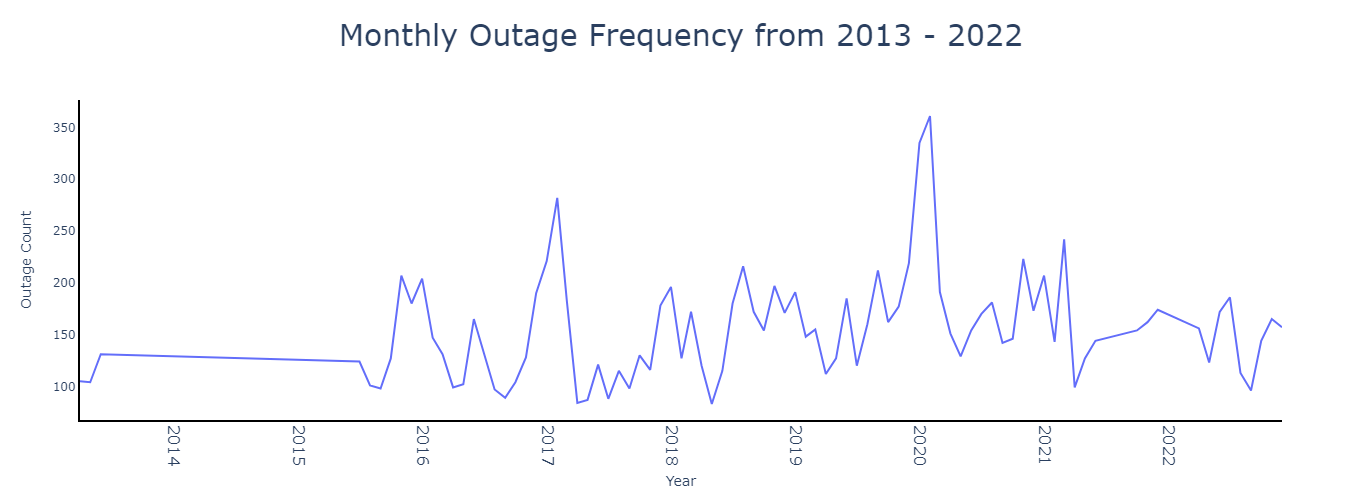

In [91]:
fig = px.line(outages_by_month, x='Year-Month', y='Outage Count', title='Monthly Outage Frequency')
fig.update_layout(
    title={'text': 'Monthly Outage Frequency from 2013 - 2022', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
 
    xaxis_title='Year-Month', 
    yaxis_title='Outage Counts',
    showlegend=False,
    height=500,
    width=900,
    plot_bgcolor='white')
fig.update_layout(xaxis_title='Year', yaxis_title='Outage Count')
fig.update_xaxes(tickangle=90, tickfont=dict(size=16))
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()



### Calculate outage frequency by hour

In [37]:
# Calculate outage frequency by hour
outages_by_hour = df.groupby(['Year', 'Month', 'Day', 'Hour']).size().reset_index(name = "Outage Count")
outages_by_hour


,Year,Month,Day,Hour,Outage Count
0,2013,4,2,7,1
1,2013,4,2,10,1
2,2013,4,2,11,1
3,2013,4,2,13,1
4,2013,4,3,8,1
...,...,...,...,...,...
10483,2022,12,30,9,1
10484,2022,12,30,10,1
10485,2022,12,30,16,1
10486,2022,12,31,21,1


In [38]:
outages_by_hour["Outage Count"].describe()

count    10488.000000
mean         1.283276
std          0.802482
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: Outage Count, dtype: float64

In [39]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

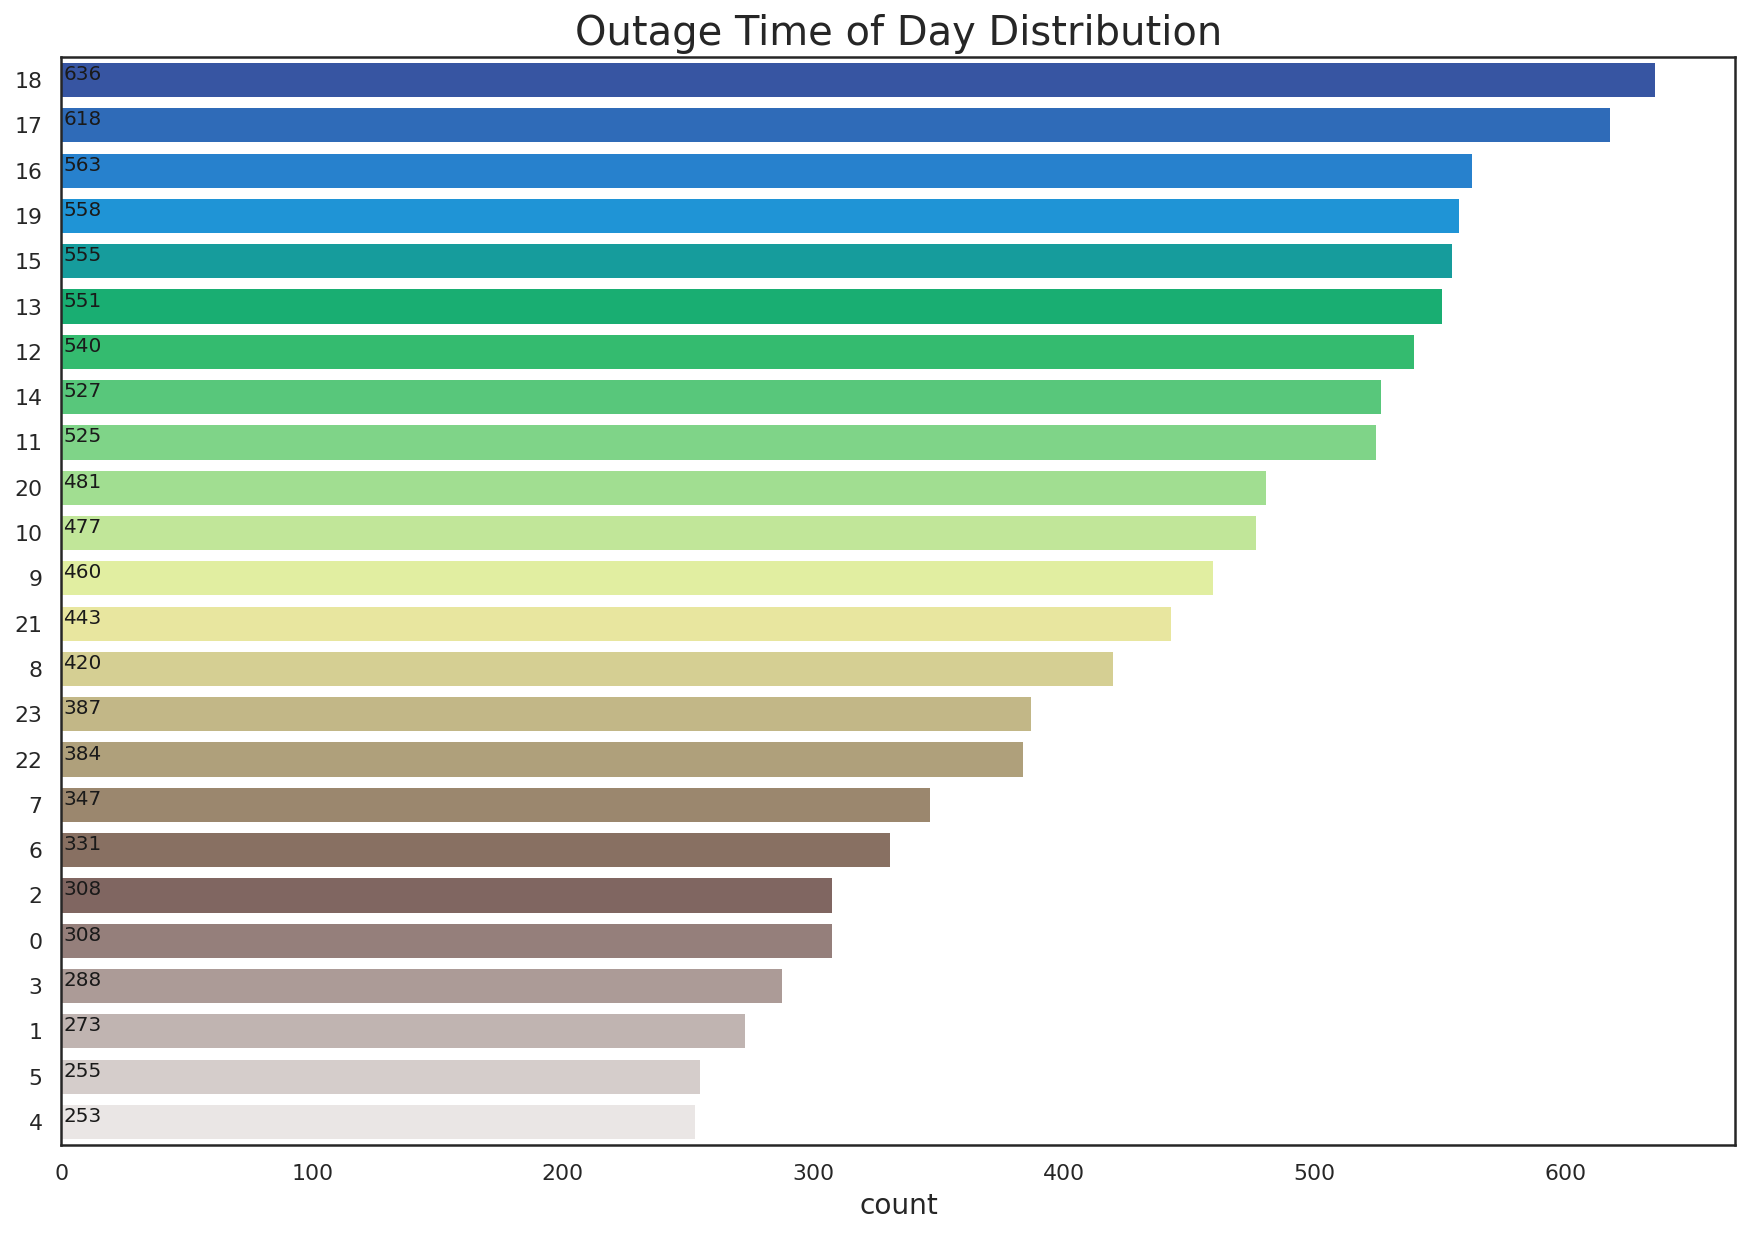

In [40]:
count_outages =  outages_by_hour['Hour'].value_counts()
drawbarplot(x=count_outages.values,y=count_outages.index,xlabel='count',title='Outage Time of Day Distribution',figsize=(15,10))

### Calculate outage frequency by day

In [94]:
outages_by_day = df.groupby(['Day_Label']).size().reset_index(name = "Outage Count")

# Define the order of the days of the week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Set the order of the x-axis labels
outages_by_day['Day_Label'] = pd.Categorical(outages_by_day['Day_Label'], categories=day_order, ordered=True)

# Sort the dataframe by the order of the days of the week
outages_by_day = outages_by_day.sort_values('Day_Label')

# # Create a bar chart of the frequency by day of the week
# plt.bar(df['Day_Label'], df['Frequency'])

In [102]:
# # Create a bar chart of the outage frequency by reason
# plt.bar(outages_by_day['Day_Label'], outages_by_day['Outage Count'])

# # Set the chart title and axis labels
# plt.title('Frequency of Outages by Day of  Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Frequency')

# # Show the chart
# plt.show()

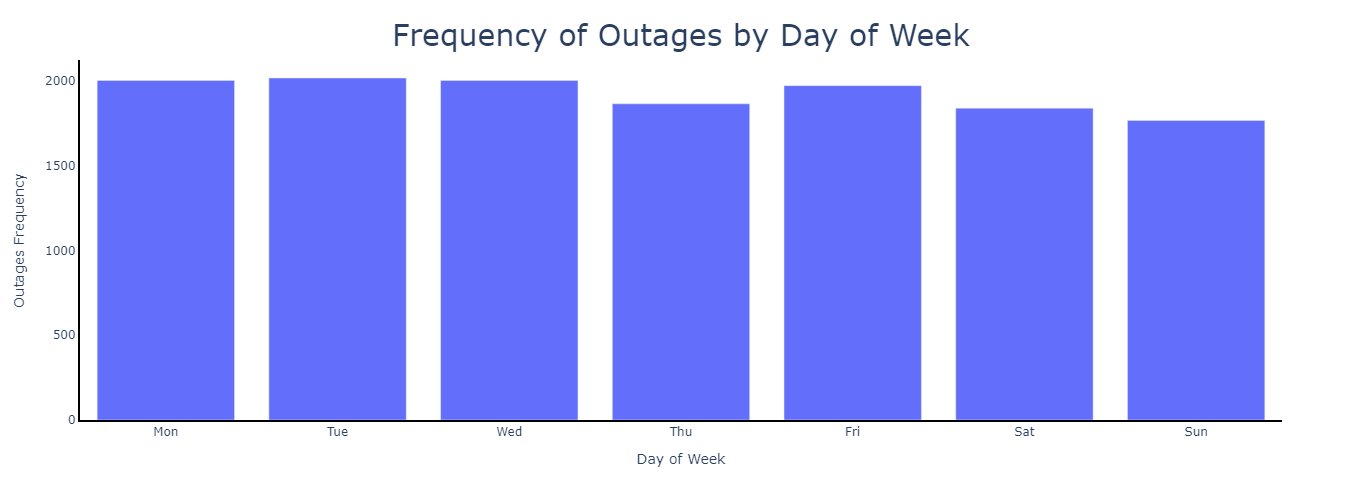

In [104]:
fig = px.bar(outages_by_day, x='Day_Label', y='Outage Count')

fig.update_layout(
    
      title={'text': 'Frequency of Outages by Day of Week', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Day of Week', 
    yaxis_title='Outages Frequency',
    showlegend=False,
    height=500,
    width=900,
    plot_bgcolor='white')
# fig.update_xaxes(tickangle=90, tickfont=dict(size=16))
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

Most of the outages are   on Tuesdays, Mondays and  Wednesdays just by frequency counts  

In [45]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.303030,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70.000000,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40.000000,Equipment fault,2019,4,2,0,1,True,False,Tue


In [56]:
df["Day_Label"].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

In [59]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.303030,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70.000000,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40.000000,Equipment fault,2019,4,2,0,1,True,False,Tue


### Compute the frequency of outages by hour and day of the week

In [105]:
# # Compute the frequency of outages by hour and day of the week
# outages_by_hour_and_day = df.groupby(['Hour', 'Day_Label']).size().reset_index(name='Frequency')
# outages_by_hour_and_day = outages_by_hour_and_day.pivot(index='Hour', columns='Day_Label', values='Frequency')

# Define the order of days of the week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert the 'Day of Week' column to a Categorical data type with the custom order
df['Day_Label'] = pd.Categorical(df['Day_Label'], categories=day_order, ordered=True)

# Compute the frequency of outages by hour and day of the week
outages_by_hour_and_day = df.groupby(['Hour', 'Day_Label']).size().reset_index(name='Frequency')
outages_by_hour_and_day = outages_by_hour_and_day.pivot(index='Hour', columns='Day_Label', values='Frequency')


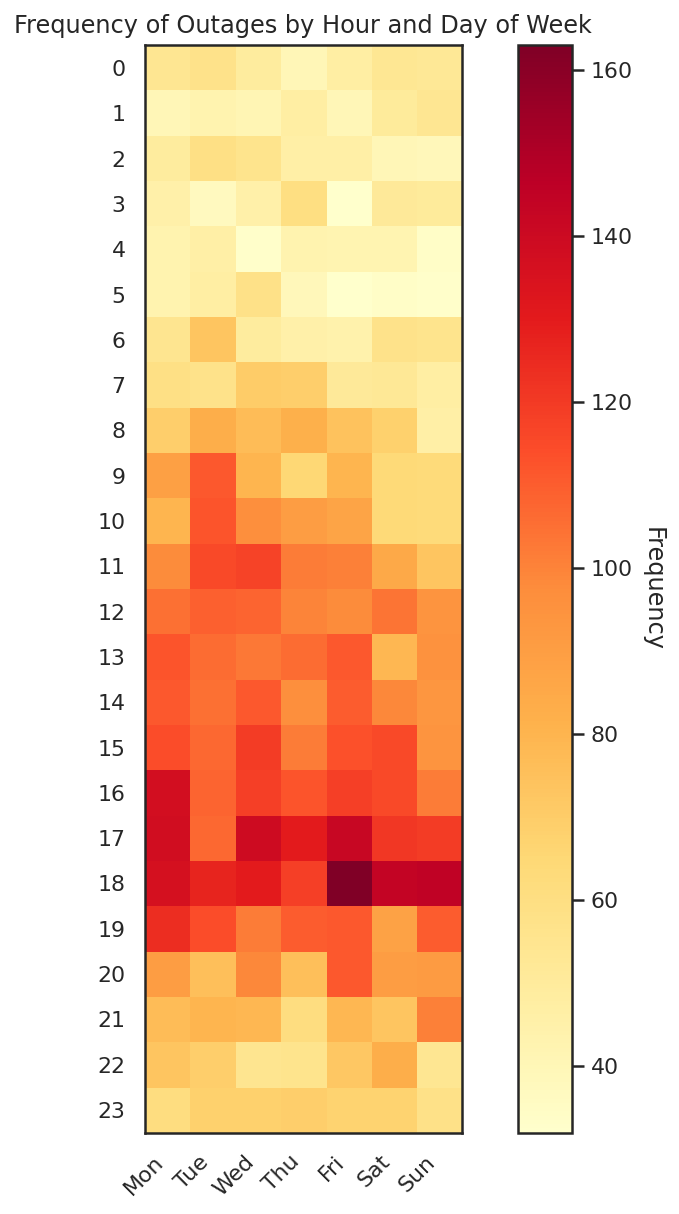

In [71]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(outages_by_hour_and_day, cmap='YlOrRd')

# Set the axis labels and ticks
ax.set_xticks(np.arange(len(outages_by_hour_and_day.columns)))
ax.set_xticklabels(outages_by_hour_and_day.columns, rotation=45, ha='right')
ax.set_yticks(np.arange(len(outages_by_hour_and_day.index)))
ax.set_yticklabels(outages_by_hour_and_day.index)

# Set the colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Frequency', rotation=-90, va='bottom')

# Set the plot title
plt.title('Frequency of Outages by Hour and Day of Week')

# Show the plot
plt.show()

In [107]:
df.head(1)

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.30303,Environmental,2019,4,1,1,0,True,False,Mon


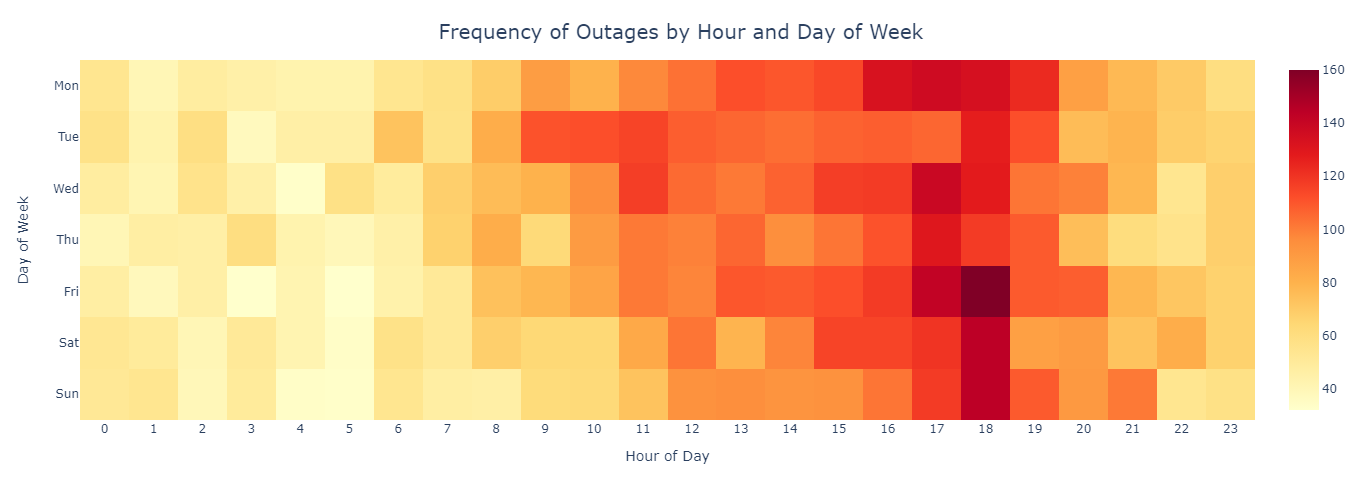

In [216]:
# Create a pivot table with hour and day of week as columns and rows
outages_by_hour_and_day = pd.pivot_table(df, index='Day_Label', columns='Hour', values='Event_ID', aggfunc='count')

# Create the heatmap with Plotly Express
fig = px.imshow(outages_by_hour_and_day, color_continuous_scale='YlOrRd')

# Set the axis labels and title
fig.update_layout(
    title={'text': 'Frequency of Outages by Hour and Day of Week', 'font': {'size': 20},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    height=500,
    width=900,
    plot_bgcolor='white',
    xaxis_title='Hour of Day',
    yaxis_title='Day of Week'
    
)
# Set the x-axis tick mode and increment
fig.update_xaxes(tickmode='linear', dtick=1)
# Show the plot
fig.show()

In [217]:
py.plot(fig, filename="average_freq_by_hour_day", auto_open = True)

'https://plotly.com/~wandabwa2004/65/'

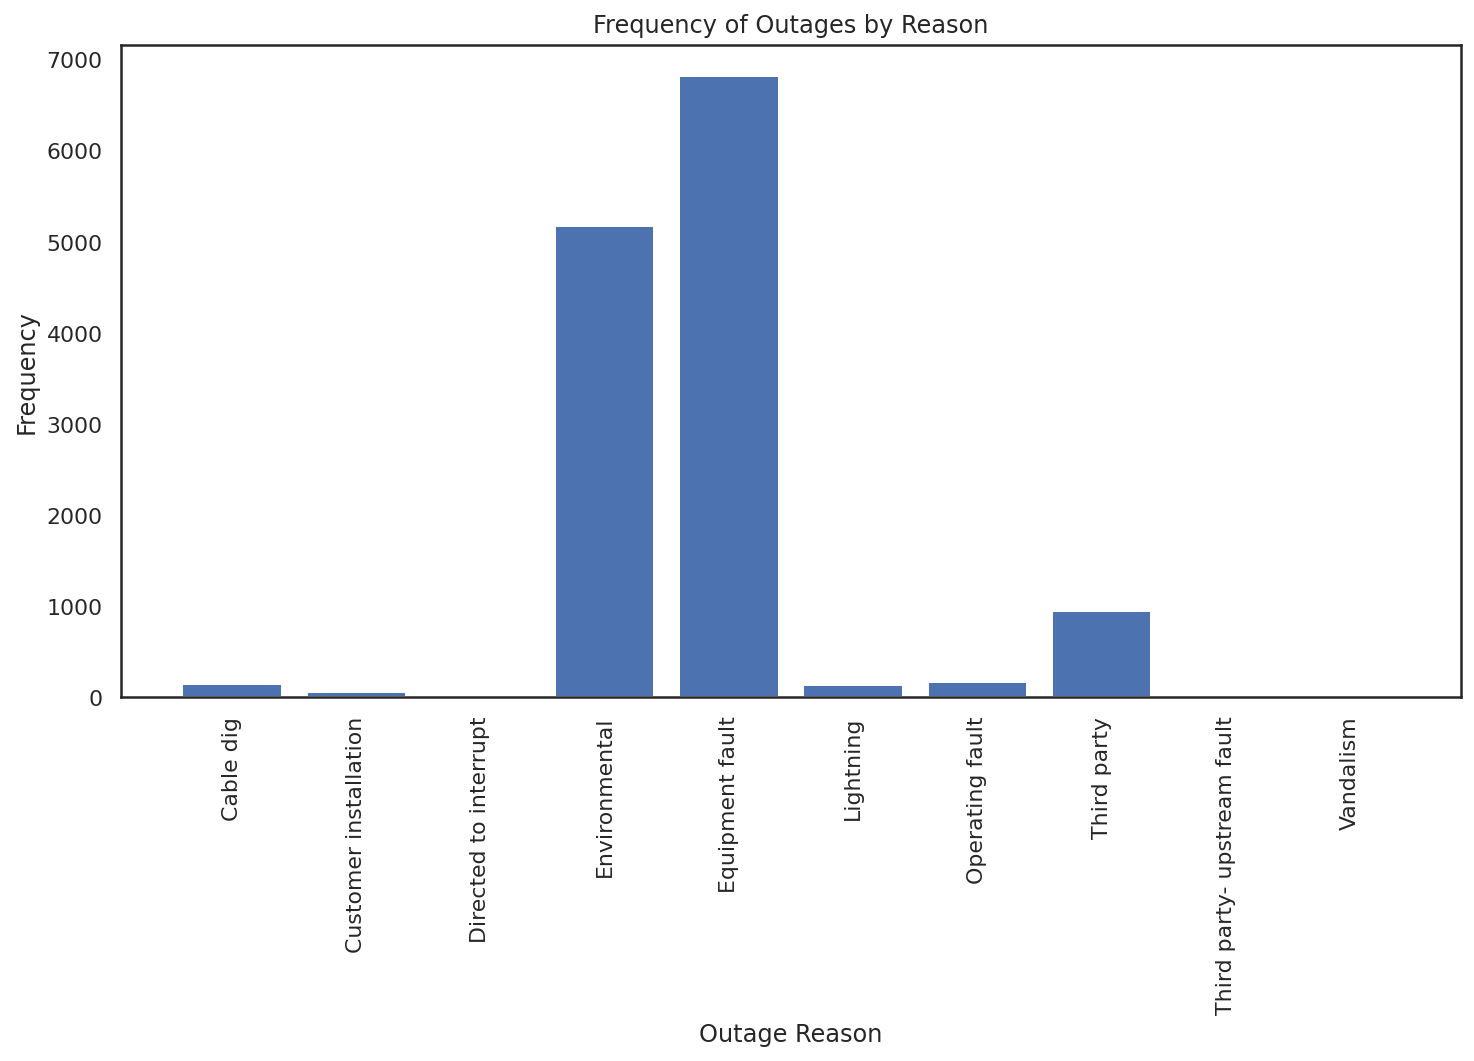

In [72]:
# Compute the frequency of outages by reason
outages_by_reason = df.groupby('Reason').size().reset_index(name='Frequency')

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(outages_by_reason['Reason'], outages_by_reason['Frequency'])

# Set the axis labels and ticks
ax.set_xlabel('Outage Reason')
ax.set_ylabel('Frequency')
ax.set_xticklabels(outages_by_reason['Reason'], rotation=90)

# Set the plot title
ax.set_title('Frequency of Outages by Reason')

# Show the plot
plt.show()

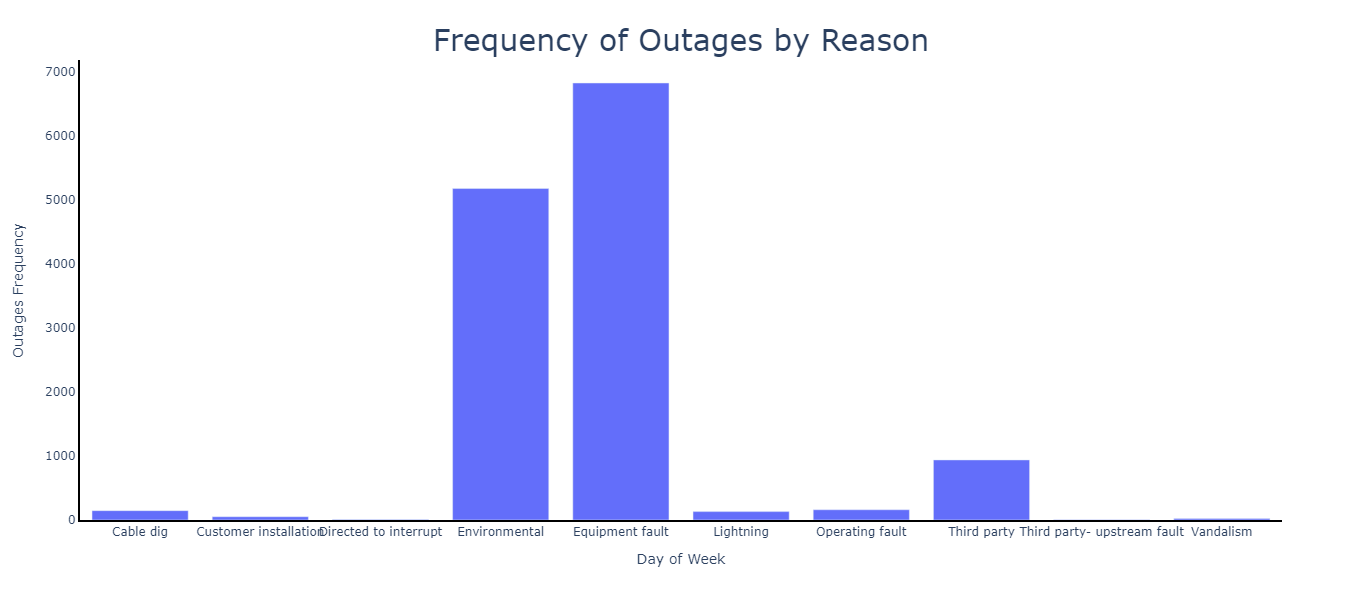

In [128]:
outages_by_reason = df.groupby('Reason').size().reset_index(name='Frequency')

fig = px.bar(outages_by_reason, x='Reason', y='Frequency')

fig.update_layout(
    
      title={'text': 'Frequency of Outages by Reason', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Day of Week', 
    yaxis_title='Outages Frequency',
    showlegend=False,
    height=600,
    width=1000,
    plot_bgcolor='white')        
            
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

### Plot the frequency of outage reasons in certain locations over time

In [74]:
df.head()

,Event ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.303030,Environmental,2019,4,1,1,0,True,False,Mon
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70.000000,Environmental,2019,4,1,2,0,True,False,Mon
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40.000000,Equipment fault,2019,4,2,0,1,True,False,Tue


In [129]:
# Group the data by year, reason, and location
grouped_data = df.groupby(['Year', 'Reason']).size().reset_index(name='Frequency')

In [130]:
grouped_data

,Year,Reason,Frequency
0,2013,Cable dig,5
1,2013,Customer installation,1
2,2013,Environmental,108
3,2013,Equipment fault,187
4,2013,Operating fault,5
...,...,...,...
71,2022,Equipment fault,701
72,2022,Lightning,7
73,2022,Operating fault,8
74,2022,Third party,95


In [131]:
grouped_data["Reason"].nunique()

10

In [133]:
# Pivot the data to create a separate line for each reason
pivot_data = grouped_data.pivot_table(index=['Year'], columns='Reason', values='Frequency', fill_value=0)

In [132]:
## Plot the data as a line chart
pivot_data.plot(kind='line', figsize=(20, 10), xlabel='Year', ylabel='Frequency', title='Frequency of Outage Reasons in Locations A and B')
plt.show()

NameError: name 'pivot_data' is not defined

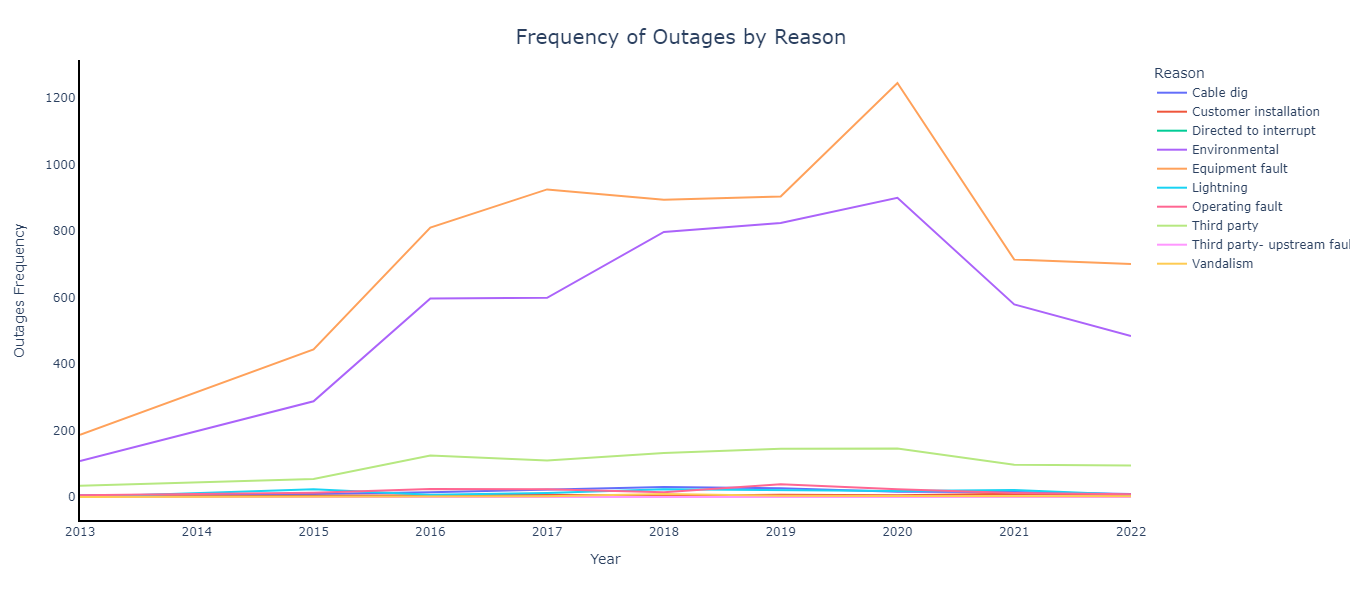

In [207]:
# Group the data by year, reason, and location
grouped_data = df.groupby(['Year', 'Reason']).size().reset_index(name='Frequency')

# Pivot the data to create a separate line for each reason
pivot_data = grouped_data.pivot_table(index=['Year'], columns='Reason', values='Frequency', fill_value=0)

# Convert the pivot table to a dataframe
pivot_data = pivot_data.reset_index()

# Melt the dataframe to create a column for reason and frequency
melted_data = pivot_data.melt(id_vars=['Year'], var_name='Reason', value_name='Frequency')

# Plot the data as a line chart
fig = px.line(melted_data, x='Year', y='Frequency', color='Reason')
fig.update_layout(
    
      title={'text': 'Frequency of Outages by Reason', 'font': {'size': 20},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year', 
    yaxis_title='Outages Frequency',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='white')        
            
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

In [208]:
py.plot(fig, filename="Outage_freq_by_reason", auto_open = True)

'https://plotly.com/~wandabwa2004/57/'

### Frequency of outages by reason over time

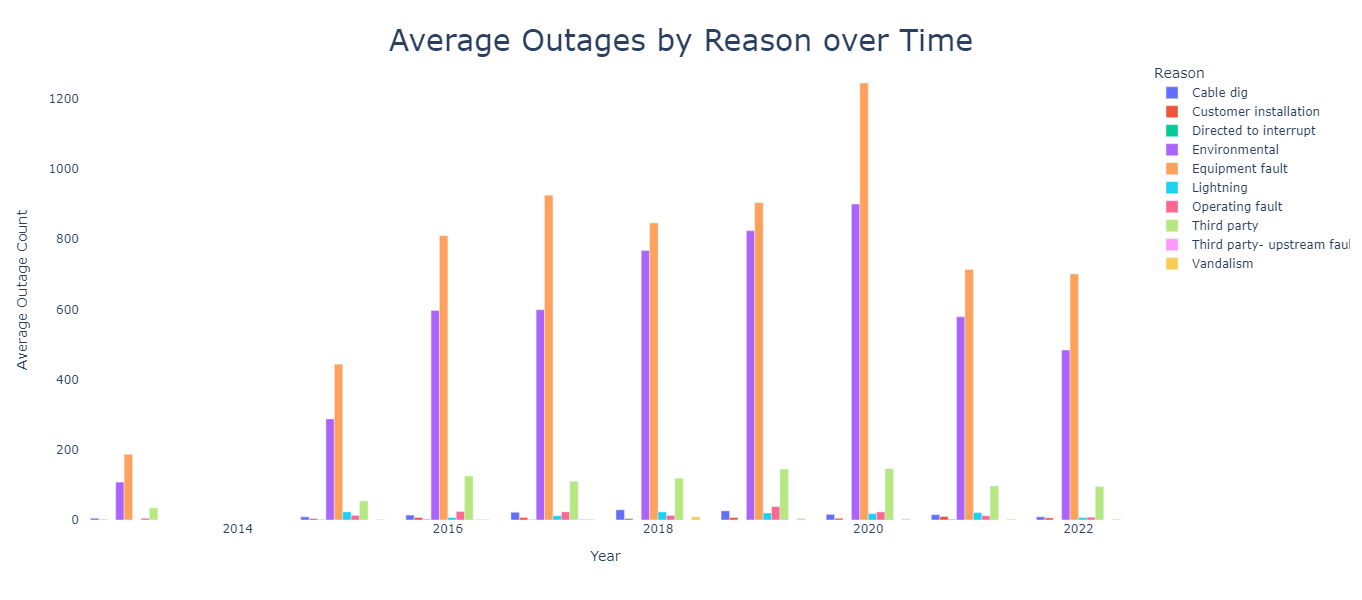

In [205]:
df_2 = df.groupby(['Year', 'Reason']).size().reset_index(name='Frequency')
avg_outages = df_2.groupby(['Reason', 'Year'])['Frequency'].mean().reset_index()

# Create a grouped bar chart
fig = px.bar(avg_outages, x='Year', y='Frequency', color='Reason', barmode='group')

fig.update_layout(
    
      title={'text': 'Average Outages by Reason over Time', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year', 
    yaxis_title='Average Outage Count',
    showlegend=True,
    height=600,
    width=1200,
    plot_bgcolor='white')  


# Add axis labels and title
# fig.update_layout(xaxis_title='Year', yaxis_title='Average Outage Count', title='Average Outages by Reason over Time')

# Show the plot
fig.show()

In [206]:
py.plot(fig, filename="average_outages_by_reason_over_time", auto_open = True)

'https://plotly.com/~wandabwa2004/59/'

In [111]:
df = df.rename(columns = {"Event ID":"Event_ID"})

In [112]:
df.head(1)

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.30303,Environmental,2019,4,1,1,0,True,False,Mon


In [117]:
# Calculate the average number of outages per location per year
avg_outages = df.groupby(['Year', 'LGA']).Event_ID.count().groupby('LGA').mean()

# Reset the index of avg_outages to a range index
avg_outages = avg_outages.reset_index()

# Calculate the total yearly outages count for each location
yearly_outages = df.groupby('LGA')['Event_ID'].count()

# Reset the index of yearly_outages to a range index
yearly_outages = yearly_outages.reset_index()

# Merge avg_outages and yearly_outages based on the 'Location' column
merged = pd.merge(avg_outages, yearly_outages, on='LGA')



In [119]:
merged.head()

,LGA,Event_ID_x,Event_ID_y
0,003,3.666667,11
1,ASHFIELD,11.888889,107
2,AUBURN,32.222222,290
3,BANKSTOWN,83.333333,750
4,BOTANY,13.000000,117


In [120]:
# Filter locations where the average number of outages was more than 1/4 of the total yearly outages count
filtered_locations = merged[merged['Event_ID_x'] > merged['Event_ID_y']/4]['LGA']

In [127]:
df1 = df.copy()

In [128]:
df1['Count'] = df1.groupby(['Year', 'LGA', 'Reason'])['Event_ID'].transform('count')


In [129]:
df1

,Event_ID,LGA,Start Date,Start Time,Customers Interrupted,Ave Dur. (min),Reason,Year,Month,Day,Hour,Day_of_week,Is Weekday,Is Weekend,Day_Label,Count
0,1652797,WARRINGAH,2019-04-01,2019-04-01 01:08:00,66,75.303030,Environmental,2019,4,1,1,0,True,False,Mon,41
1,1652798,GOSFORD,2019-04-01,2019-04-01 02:25:00,105,70.000000,Environmental,2019,4,1,2,0,True,False,Mon,77
2,1652802,WYONG,2019-04-01,2019-04-01 04:31:00,1112,84.620628,Environmental,2019,4,1,4,0,True,False,Mon,51
3,1653082,BANKSTOWN,2019-04-01,2019-04-01 22:54:41,62,245.316667,Equipment fault,2019,4,1,22,0,True,False,Mon,44
4,1653088,WOOLLAHRA,2019-04-02,2019-04-02 00:45:00,89,40.000000,Equipment fault,2019,4,2,0,1,True,False,Tue,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,1821703,MOSMAN,2020-12-30,2020-12-30 13:39:27,118,110.550000,Environmental,2020,12,30,13,2,True,False,Wed,5
13483,1821723,HORNSBY,2020-12-30,2020-12-30 14:30:00,148,10.000000,Equipment fault,2020,12,30,14,2,True,False,Wed,48
13484,1821769,RYDE,2020-12-31,2020-12-31 03:41:00,914,180.404372,Equipment fault,2020,12,31,3,3,True,False,Thu,39
13485,1821787,PORT STEPHENS,2020-12-31,2020-12-31 07:35:23,84,184.616667,Environmental,2020,12,31,7,3,True,False,Thu,24


In [130]:
# Group data by year and Event ID and calculate count of Event IDs (outages) and mean count
grouped_data = df1.groupby(['Year', 'Event_ID']).agg({'Event_ID': 'count', 'Count': 'mean'})
grouped_data.columns = ['Outages', 'Avg Outages']

In [131]:
grouped_data

Outages  Avg Outages
Year Event_ID                      
2013 956439          1          1.0
     956577          1          5.0
     956624          1          7.0
     956714          1          3.0
     956945          1          2.0
...                ...          ...
2022 1980316         1         29.0
     1980384         1         19.0
     1980497         1         35.0
     1980505         1         11.0
     1981961         1         35.0

[13175 rows x 2 columns]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 13486
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event_ID               13459 non-null  object        
 1   LGA                    13459 non-null  object        
 2   Start Date             13459 non-null  datetime64[ns]
 3   Start Time             13459 non-null  datetime64[ns]
 4   Customers Interrupted  13459 non-null  object        
 5   Ave Dur. (min)         13459 non-null  float64       
 6   Reason                 13459 non-null  object        
 7   Year                   13459 non-null  int64         
 8   Month                  13459 non-null  int64         
 9   Day                    13459 non-null  int64         
 10  Hour                   13459 non-null  int64         
 11  Day_of_week            13459 non-null  int64         
 12  Is Weekday             13459 non-null  bool          
 13  I

In [168]:
len(df[df["Event_ID"].duplicated()])

284

### Calculate  the likelihood of  an outage in a given area

In [151]:
df_4 = df[["Event_ID","LGA","Start Time","Reason"]]

In [163]:
df_4.Event_ID.nunique()

13175

In [162]:
df_4 = df_4.drop_duplicates()

In [165]:
df_4[df_4["Event_ID"].duplicated()]

,Event_ID,LGA,Start Time,Reason
9140,1592611,HORNSBY,2018-08-27 08:28:33,Equipment fault
9242,1598617,HORNSBY,2018-09-26 16:02:00,Environmental


In [170]:
df_4[df_4["Event_ID"] == 1598617]

,Event_ID,LGA,Start Time,Reason
3486,1598617,KU-RING-GAI,2018-09-26 16:02:00,Environmental
9242,1598617,HORNSBY,2018-09-26 16:02:00,Environmental


In [164]:
total_outages = len(df_4)
total_outages

13177

In [147]:
# # group by location, year, and event ID, and count the number of events
# location_year_event_count = df1.groupby(['LGA', 'Year', 'Event_ID']).size().reset_index(name='Count')

# # group by location and year, and sum the counts
# location_year_count = location_year_event_count.groupby(['LGA', 'Year'])['Count'].sum().reset_index(name='Total_Count')

# # plot the data using subplots
# locations = location_year_count['LGA'].unique()

# fig, axs = plt.subplots(len(locations), figsize=(10, 40), sharex=True)

# for i, location in enumerate(locations):
#     data = location_year_count[location_year_count['LGA'] == location]
#     axs[i].bar(data['Year'], data['Total_Count'])
#     axs[i].set_title(location)

# plt.show()

In [148]:
# # Group data by year and location and get count of Event_IDs
# outage_count = df.groupby(['Year', 'LGA']).size().reset_index(name='Count')

# # Sort data by year and count in descending order
# outage_count = outage_count.sort_values(['Year', 'Count'], ascending=[True, False])

# # Create two subplots
# fig, axs = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)

# # Set the same y-axis range for both subplots
# axs[0].set_ylim([0, 200])
# axs[1].set_ylim([0, 200])

# # Plot the data for each year in separate subplots
# for year, ax in zip(sorted(outage_count['Year'].unique()), axs):
#     # Get data for current year
#     year_data = outage_count[outage_count['Year'] == year].head(10)

#     # Plot bar chart
#     ax.bar(year_data['LGA'], year_data['Count'])

#     # Set title for subplot
#     ax.set_title(f'Year {year}')

# # Set common x-axis label
# plt.xlabel('LGA')

# # Display the plot
# plt.show()

In [220]:
# Calculate the total number of outages in the dataset
total_outages = len(df)

# Group the data by location and reason, and calculate the number of outages in each group
outages_by_location_reason = df.groupby(['LGA', 'Reason']).size().reset_index(name='outage_count')

# Calculate the probability of an outage in each location
outages_by_location_reason['outage_probability'] = outages_by_location_reason['outage_count'] / total_outages

# Display the result
print(outages_by_location_reason[['LGA', 'Reason', 'outage_probability']])

          LGA           Reason  outage_probability
0         003    Environmental            0.000224
1         003  Equipment fault            0.000598
2    ASHFIELD    Environmental            0.002095
3    ASHFIELD  Equipment fault            0.004863
4    ASHFIELD  Operating fault            0.000150
..        ...              ...                 ...
268     WYONG  Equipment fault            0.025959
269     WYONG        Lightning            0.001945
270     WYONG  Operating fault            0.000598
271     WYONG      Third party            0.003591
272     WYONG        Vandalism            0.000224

[273 rows x 3 columns]


In [221]:
outages_by_location_reason.head()

,LGA,Reason,outage_count,outage_probability
0,003,Environmental,3,0.000224
1,003,Equipment fault,8,0.000598
2,ASHFIELD,Environmental,28,0.002095
3,ASHFIELD,Equipment fault,65,0.004863
4,ASHFIELD,Operating fault,2,0.000150


In [222]:
outages_by_location_reason[outages_by_location_reason["LGA"] == "ASHFIELD"]

,LGA,Reason,outage_count,outage_probability
2,ASHFIELD,Environmental,28,0.002095
3,ASHFIELD,Equipment fault,65,0.004863
4,ASHFIELD,Operating fault,2,0.000150
5,ASHFIELD,Third party,12,0.000898


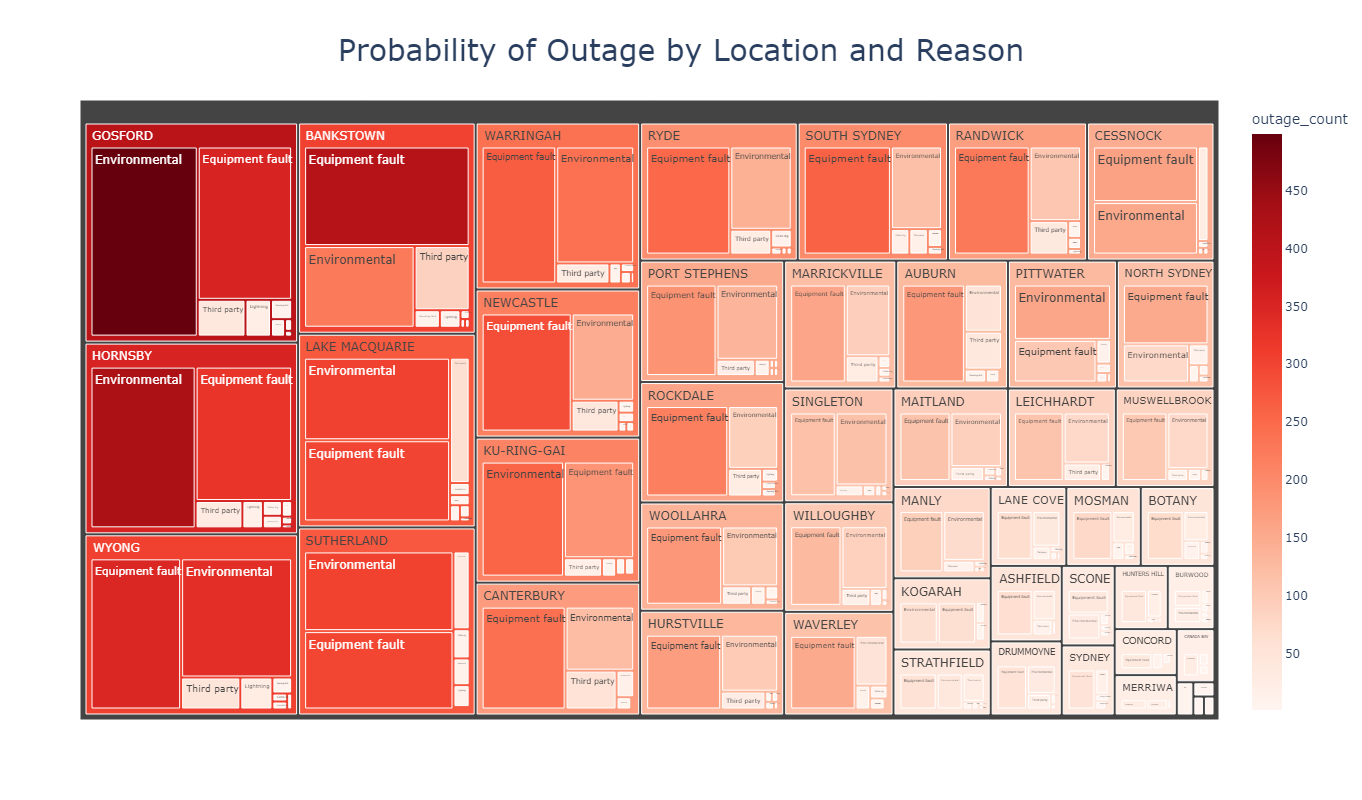

In [311]:
# Create a treemap chart
fig = px.treemap(outages_by_location_reason, 
                 path=['LGA', 'Reason'], 
                 values='outage_probability',
                 color='outage_count',
                 hover_data=['outage_probability'],
                 color_continuous_scale='Reds',
                 title='Outages by Location and Reason')
fig.update_layout(title={'text': 'Probability of Outage by Location and Reason', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year', 
    yaxis_title='Average Outage Count',
    showlegend=True,
    height=800,
    width=1400,
    plot_bgcolor='white')  
# Show the chart
fig.show()

In [312]:
py.plot(fig, filename="probability_outage_reason", auto_open = True)

'https://plotly.com/~wandabwa2004/70/'

In [224]:
# Create a DataFrame with location data and outage count
location_outages = df.groupby('LGA')['Event_ID'].count().reset_index(name='Outage Count')




In [288]:
# # Load the GeoJSON file with the shape data for each location
# geojson_url = 'https://raw.githubusercontent.com/rowanhogan/australian-states/master/states.geojson'
# geojson_data = gpd.read_file(geojson_url)

# Load the GeoJSON file with the shape data for each city
# Load the GeoJSON file with the shape data for each city
geojson_url = 'https://raw.githubusercontent.com/AshKyd/leaflet-geojson-map-boilerplate/master/data/australia.cities.geo.json'
geojson_data = gpd.read_file(geojson_url)


In [289]:
geojson_data = gpd.read_file(geojson_url)
geojson_data

,name,feature_code,population,geometry
0,Sydney,PPLA,4627345,POINT (151.20732 -33.86785)
1,Melbourne,PPLA,4246375,POINT (144.96332 -37.81400)
2,Brisbane,PPLA,2189878,POINT (153.02809 -27.46794)
3,Perth,PPLA,1896548,POINT (115.86140 -31.95224)
4,Adelaide,PPLA,1225235,POINT (138.59863 -34.92866)
...,...,...,...,...
2352,Monkey Mia,PPL,27,POINT (113.71804 -25.79402)
2353,Exmouth,PPL,26,POINT (114.12501 -21.94020)
2354,Brindabella,PPL,23,POINT (148.73333 -35.40000)
2355,Ajana,PPL,22,POINT (114.63017 -27.95582)


In [290]:
geojson_data.dtypes

name              object
feature_code      object
population         int64
geometry        geometry
dtype: object

In [291]:
geojson_data[geojson_data["name"] == "Hornsby"]

,name,feature_code,population,geometry
95,Hornsby,PPL,19863,POINT (151.09931 -33.70244)


In [261]:
location_outages.sample(10)

,LGA,Outage Count
16,HURSTVILLE,301
37,SINGLETON,248
34,ROCKDALE,346
8,CESSNOCK,351
17,KOGARAH,138
25,MERRIWA,50
45,WOOLLAHRA,311
10,CONCORD,57
24,MARRICKVILLE,286
30,NORTH SYDNEY,249


In [292]:
# function to format names
def format_name(name):
    return ' '.join([n.title() for n in name.split()])

# apply the function to the column
location_outages['LGA'] = location_outages['LGA'].apply(format_name)

In [293]:
location_outages["LGA"].unique()

array(['003', 'Ashfield', 'Auburn', 'Bankstown', 'Botany', 'Burwood',
       'Canada Bay', 'Canterbury', 'Cessnock', 'Chatswood', 'Concord',
       'Drummoyne', 'Dungog', 'Gosford', 'Hornsby', 'Hunters Hill',
       'Hurstville', 'Kogarah', 'Ku-Ring-Gai', 'Lake Macquarie',
       'Lane Cove', 'Leichhardt', 'Maitland', 'Manly', 'Marrickville',
       'Merriwa', 'Mid-Western Reg', 'Mosman', 'Muswellbrook',
       'Newcastle', 'North Sydney', 'Pittwater', 'Port Stephens',
       'Randwick', 'Rockdale', 'Ryde', 'Scone', 'Singleton',
       'South Sydney', 'Strathfield', 'Sutherland', 'Sydney', 'Warringah',
       'Waverley', 'Willoughby', 'Woollahra', 'Wyong'], dtype=object)

In [294]:
# Merge the outage data with the city shape data
merged_data = pd.merge(location_outages, geojson_data, left_on='LGA', right_on='name')
merged_data

,LGA,Outage Count,name,feature_code,population,geometry
0,Auburn,285,Auburn,PPL,663,POINT (138.68521 -34.02691)
1,Botany,116,Botany,PPL,7455,POINT (151.19591 -33.94599)
2,Burwood,59,Burwood,PPL,11886,POINT (145.11901 -37.84978)
3,Canterbury,436,Canterbury,PPL,7660,POINT (145.08476 -37.82470)
4,Cessnock,351,Cessnock,PPL,16393,POINT (151.35623 -32.83211)
5,Chatswood,4,Chatswood,PPL,7777,POINT (151.18333 -33.80000)
6,Concord,57,Concord,PPL,13008,POINT (151.10381 -33.84722)
7,Drummoyne,105,Drummoyne,PPL,10385,POINT (151.15491 -33.85237)
8,Dungog,6,Dungog,PPL,2102,POINT (151.75758 -32.40032)
9,Gosford,938,Gosford,PPL,3021,POINT (151.34399 -33.42440)


In [295]:
merged_data.dtypes

LGA               object
Outage Count       int64
name              object
feature_code      object
population         int64
geometry        geometry
dtype: object

In [296]:
merged_data['latitude'] = merged_data['geometry'].apply(lambda p: p.y)
merged_data['longitude'] = merged_data['geometry'].apply(lambda p: p.x)

In [298]:
merged_data.head()

,LGA,Outage Count,name,feature_code,population,geometry,latitude,longitude
0,Auburn,285,Auburn,PPL,663,POINT (138.68521 -34.02691),-34.02691,138.68521
1,Botany,116,Botany,PPL,7455,POINT (151.19591 -33.94599),-33.94599,151.19591
2,Burwood,59,Burwood,PPL,11886,POINT (145.11901 -37.84978),-37.84978,145.11901
3,Canterbury,436,Canterbury,PPL,7660,POINT (145.08476 -37.82470),-37.82470,145.08476
4,Cessnock,351,Cessnock,PPL,16393,POINT (151.35623 -32.83211),-32.83211,151.35623


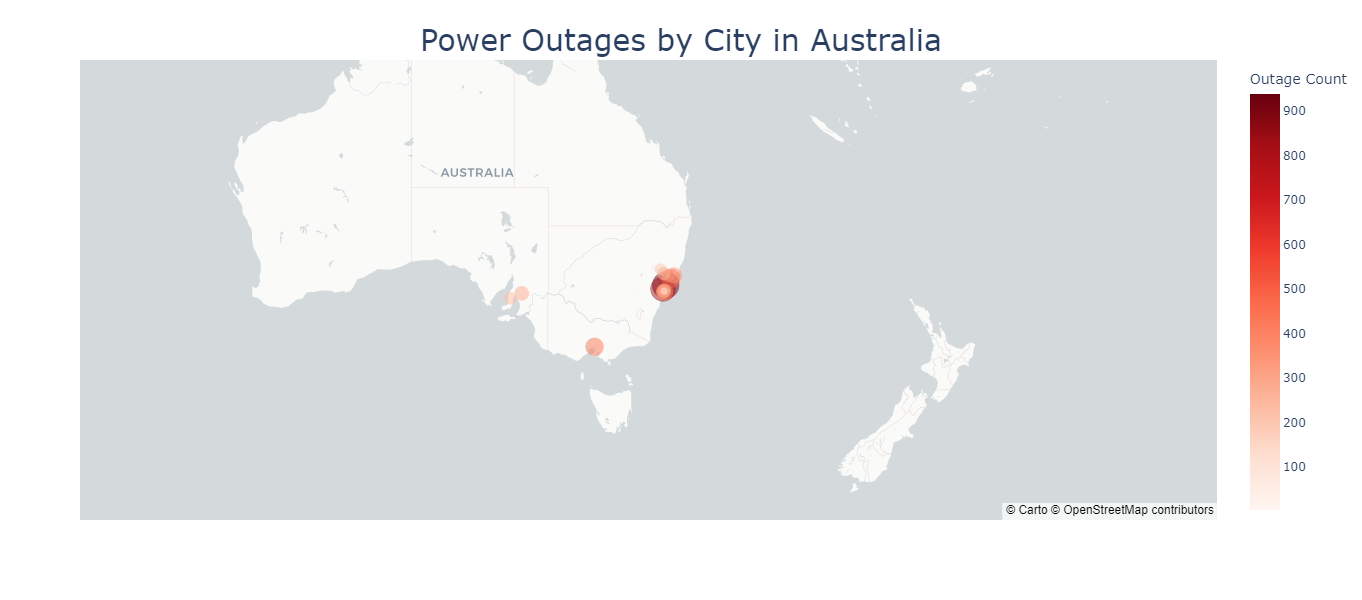

In [303]:
fig = px.scatter_mapbox(merged_data,
                        lat="latitude",
                        lon="longitude",
                        color='Outage Count',
                        size='Outage Count',
                        color_continuous_scale='Reds',
                        mapbox_style='carto-positron',
                        zoom=3,
                        opacity=0.5,
                        labels={'Outage Count': 'Outage Count'})

# Set the map title
# fig.update_layout(title_text='Power Outages by City in Australia')
fig.update_layout(title={'text': 'Power Outages by City in Australia', 'font': {'size': 30},
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year', 
    yaxis_title='Average Outage Count',
    showlegend=True,
    height=600,
    width=1200,
    plot_bgcolor='white') 

# Show the map
fig.show()

In [304]:
py.plot(fig, filename="outage_count_by_city", auto_open = True)

'https://plotly.com/~wandabwa2004/68/'